In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength' , 'fWidth' , 'fSize' , 'fConc' , 'fConc1' , 'fAsym' ,'fM3Long' , 'fM3Trans' , 'fAlpha' , 'fDist' , 'class' ]
df = pd.read_csv("magic04.data" , names = cols)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [3]:
df['class'] = (df['class'] == 'g').astype(int)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']


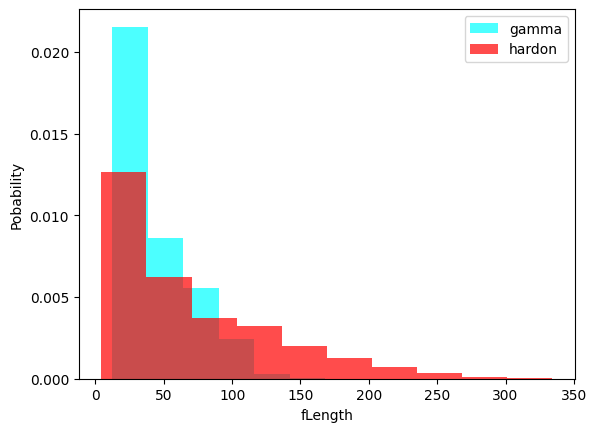

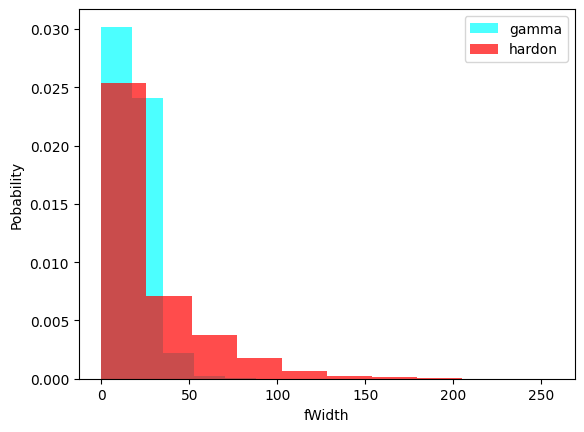

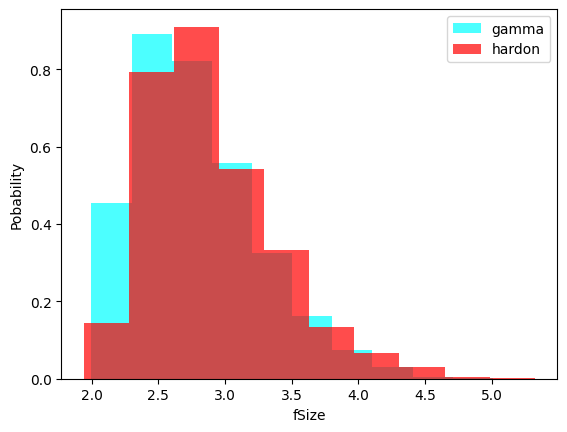

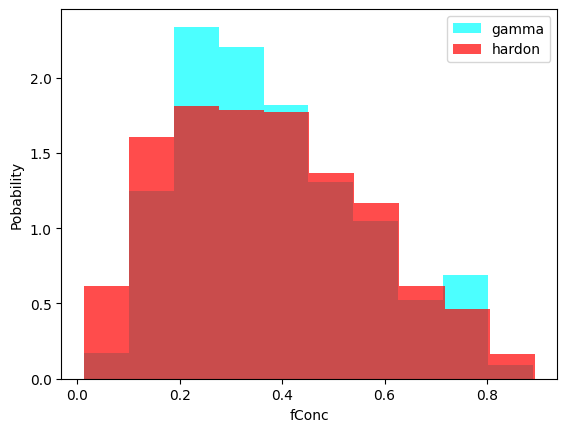

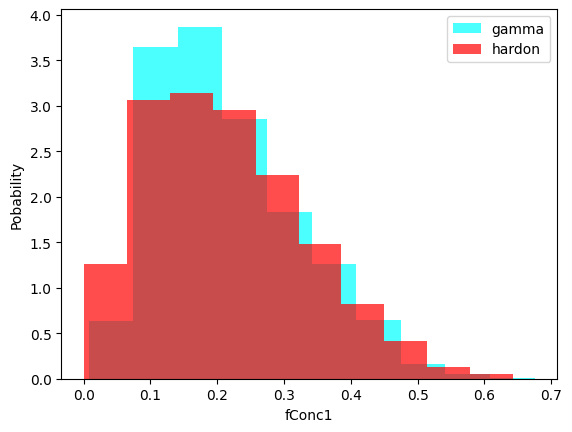

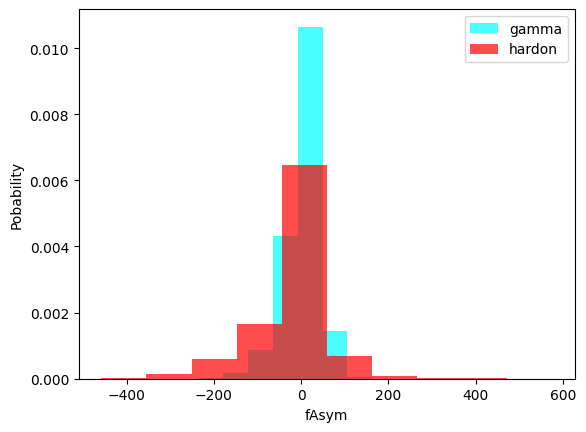

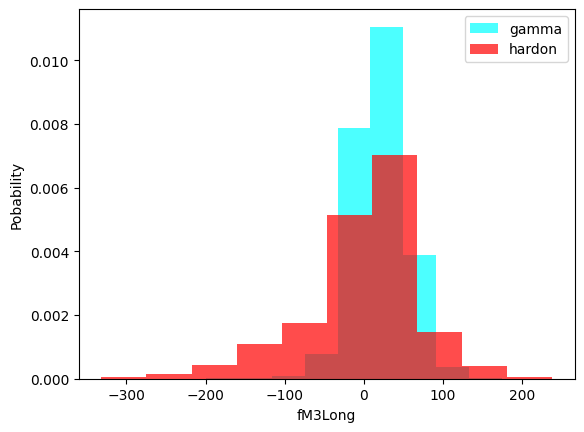

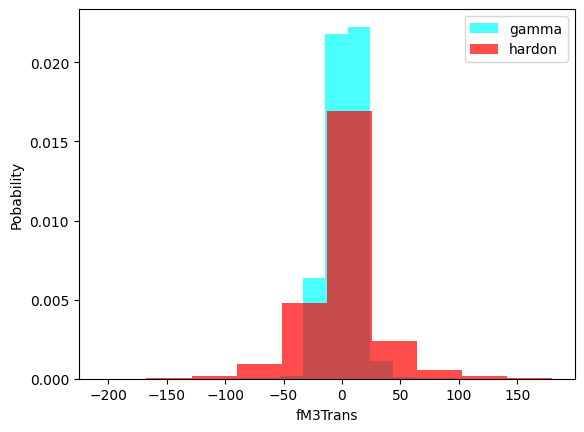

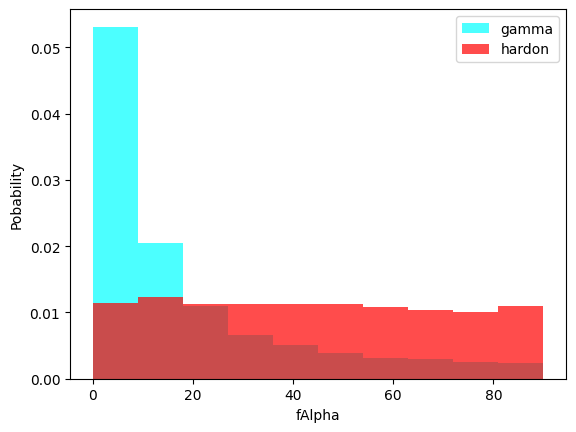

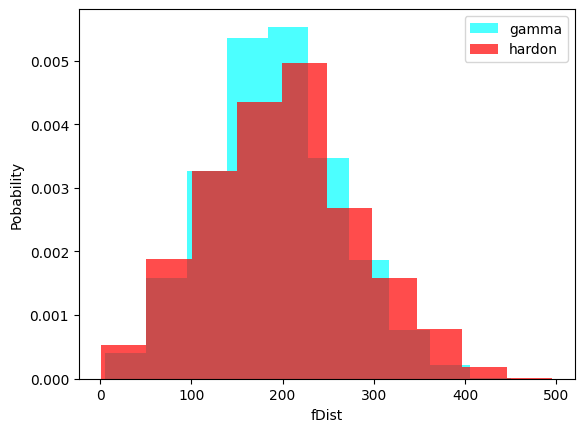

In [4]:
print(cols[:-1])
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label] , color = 'cyan' , label = 'gamma' , alpha = 0.7 , density = True)
  plt.hist(df[df['class'] == 0][label] , color = 'red' , label = 'hardon' , alpha = 0.7 , density = True)
  plt.ylabel('Pobability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [5]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

D:\Users\srish\PycharmProjects\MajorProject\CodingNinjas\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe , oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X , Y = ros.fit_resample(X , Y)

  data = np.hstack((X , np.reshape(Y , (-1 , 1))))

  return data , X, Y

In [7]:
train , X_train , Y_train = scale_dataset(train , oversample = True)
valid , X_valid , Y_valid = scale_dataset(valid , oversample = False)
test , X_test , Y_test = scale_dataset(test , oversample = False)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1312
           1       0.84      0.88      0.86      2492

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804


In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model  = GaussianNB()
nb_model = nb_model.fit(X_train , Y_train)

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49      1312
           1       0.74      0.89      0.81      2492

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model  = LogisticRegression ()
lg_model = lg_model.fit(X_train , Y_train)

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1312
           1       0.85      0.81      0.83      2492

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804


In [20]:
from sklearn.svm import SVC 

In [21]:
svm_model = SVC()
svm_model = svm_model.fit(X_train , Y_train)

In [33]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1312
           1       0.89      0.90      0.90      2492

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804


In [27]:
import tensorflow as tf

In [25]:
def plot_history(history):
    fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (10 ,4))
    ax1.plot(history.history['loss'] , label = 'loss')
    ax1.plot(history.history['val_loss'] , label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'] , label = 'accuracy')
    ax2.plot(history.history['val_accuracy'] , label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()



In [30]:
def train_model(X_train , Y_train , num_nodes , dropout_prob , lr , batch_size , epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes , activation = 'relu' , input_shape = (10 , )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes , activation = 'relu' ),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1 , activation = 'sigmoid')  
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr) , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    history = nn_model.fit(    X_train , Y_train, epochs = epochs , batch_size= batch_size , validation_split = 0.2 , verbose = 0)

    return nn_model , history


nodes = 16, dropout = 0, lr = 0.01, batch size = 32


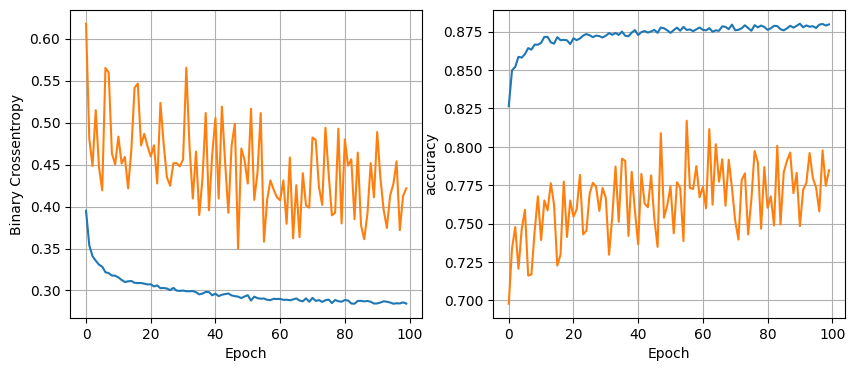

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8691
nodes = 16, dropout = 0, lr = 0.01, batch size = 64


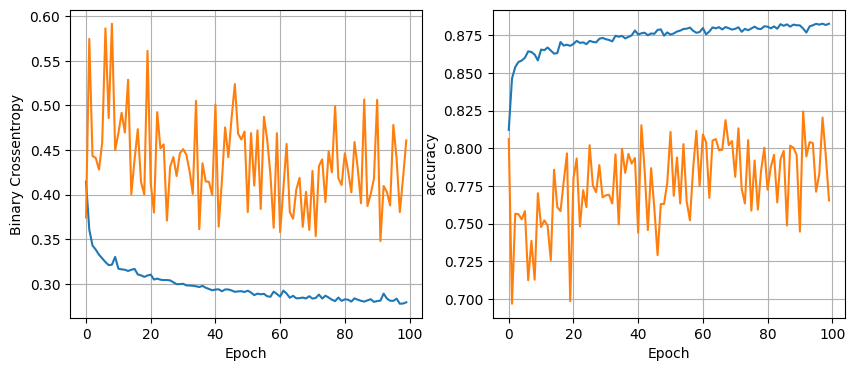

119/119 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8712
nodes = 16, dropout = 0, lr = 0.01, batch size = 128


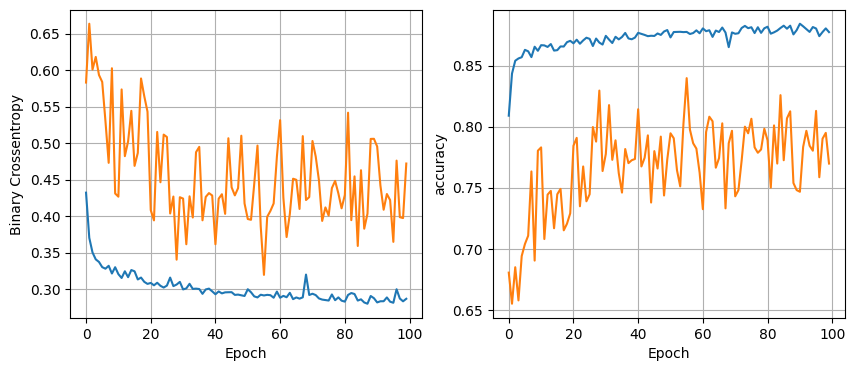

119/119 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8775
nodes = 16, dropout = 0, lr = 0.005, batch size = 32


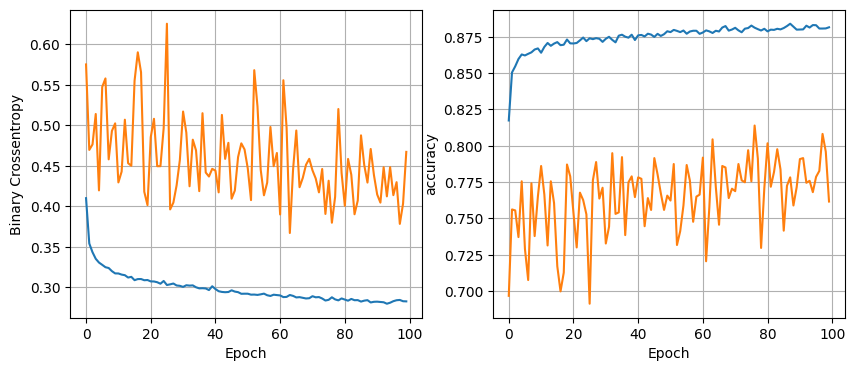

119/119 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8796
nodes = 16, dropout = 0, lr = 0.005, batch size = 64


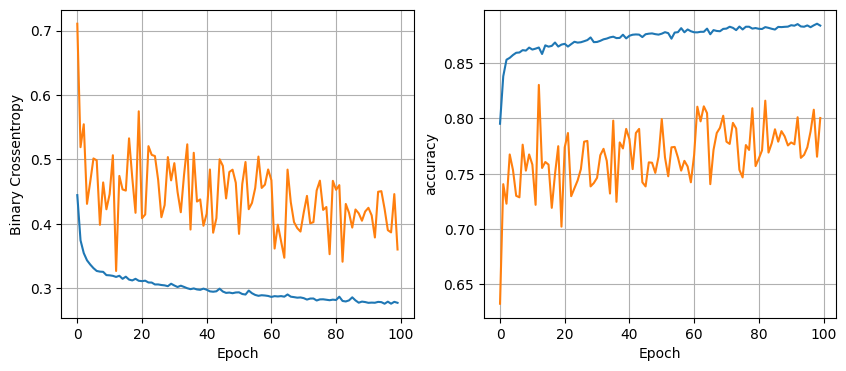

119/119 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8691
nodes = 16, dropout = 0, lr = 0.005, batch size = 128


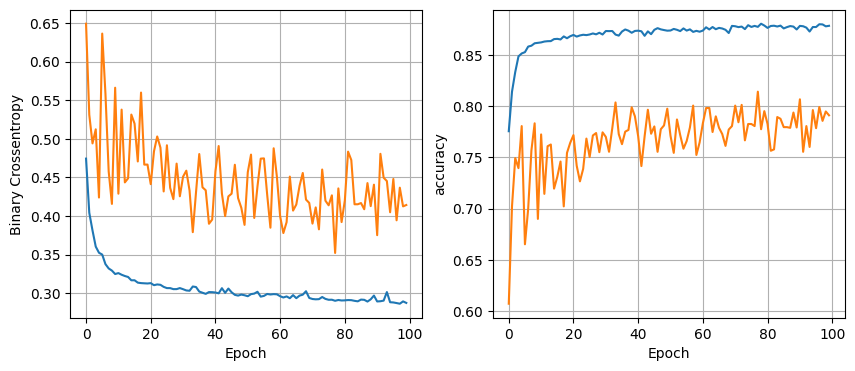

119/119 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8817
nodes = 16, dropout = 0, lr = 0.001, batch size = 32


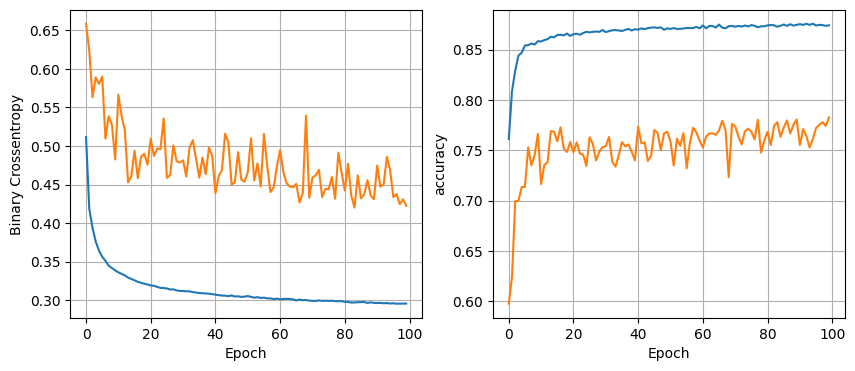

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8712
nodes = 16, dropout = 0, lr = 0.001, batch size = 64


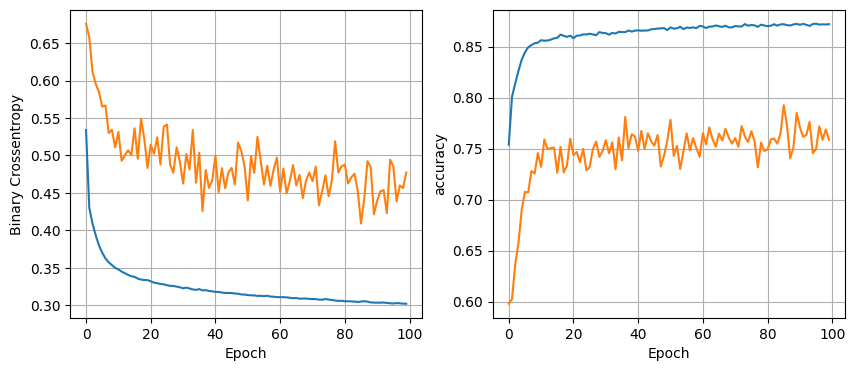

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8707
nodes = 16, dropout = 0, lr = 0.001, batch size = 128


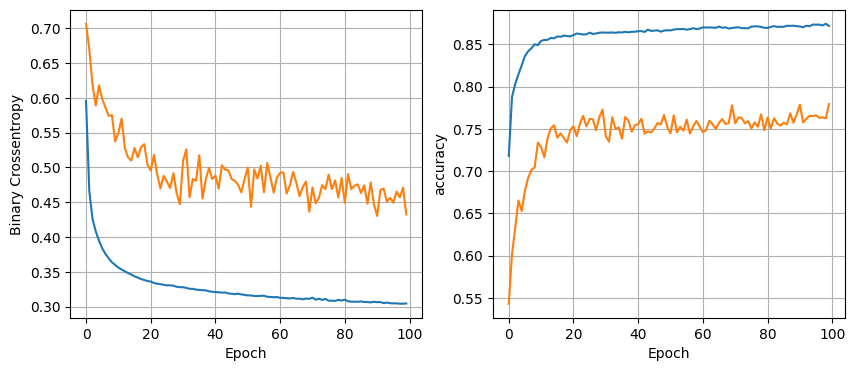

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8672
nodes = 16, dropout = 0.2, lr = 0.01, batch size = 32


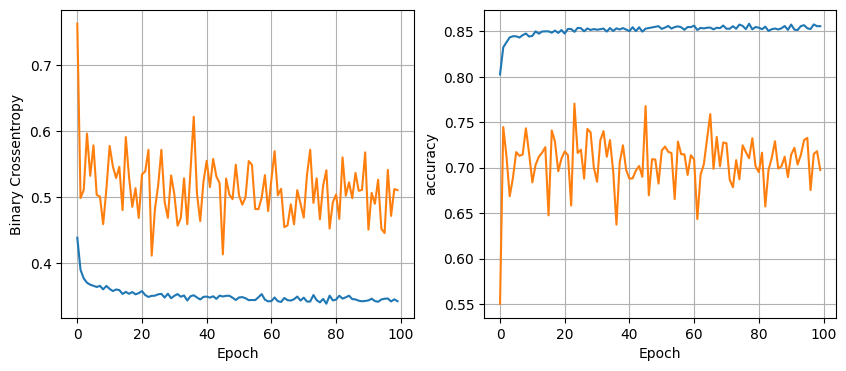

119/119 [==============================] - 1s 6ms/step - loss: 0.3104 - accuracy: 0.8715
nodes = 16, dropout = 0.2, lr = 0.01, batch size = 64


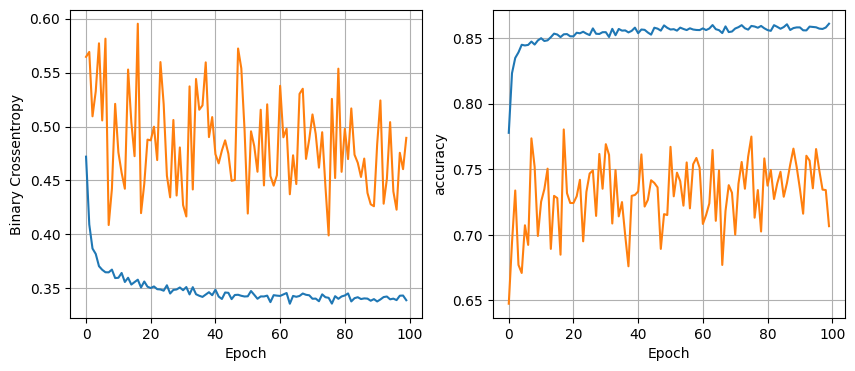

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8743
nodes = 16, dropout = 0.2, lr = 0.01, batch size = 128


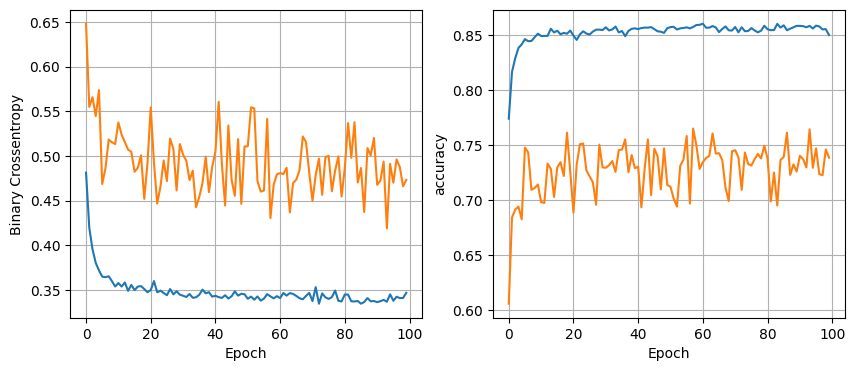

119/119 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8707
nodes = 16, dropout = 0.2, lr = 0.005, batch size = 32


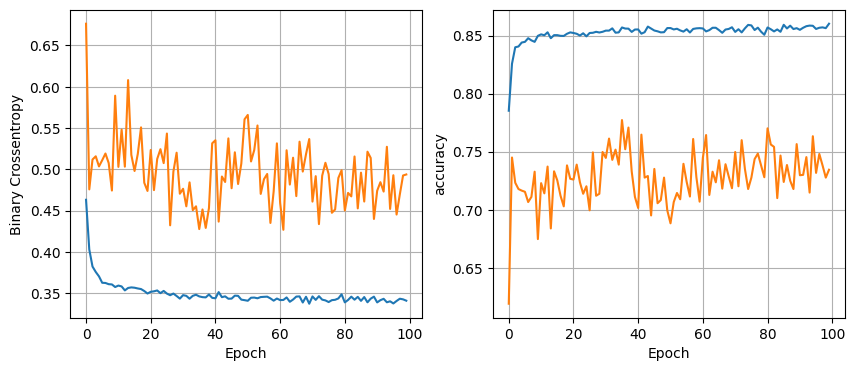

119/119 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8764
nodes = 16, dropout = 0.2, lr = 0.005, batch size = 64


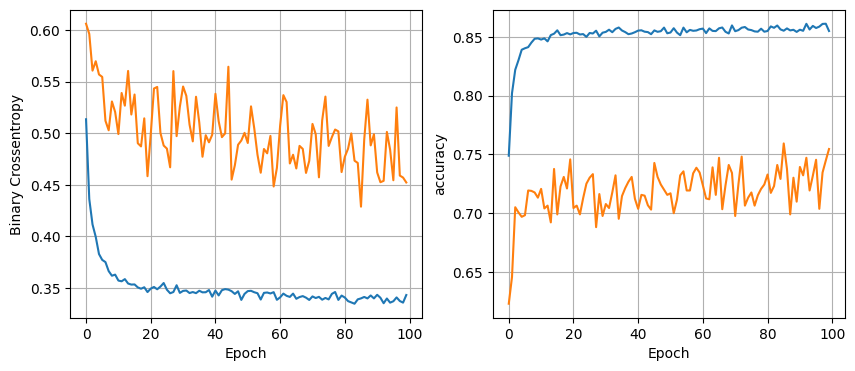

119/119 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8715
nodes = 16, dropout = 0.2, lr = 0.005, batch size = 128


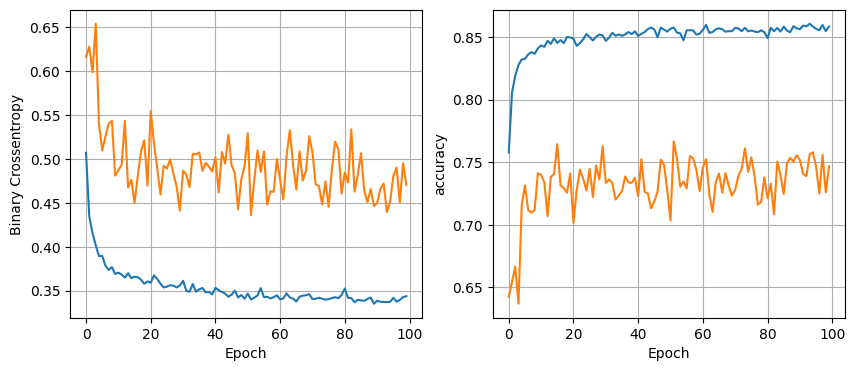

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8709
nodes = 16, dropout = 0.2, lr = 0.001, batch size = 32


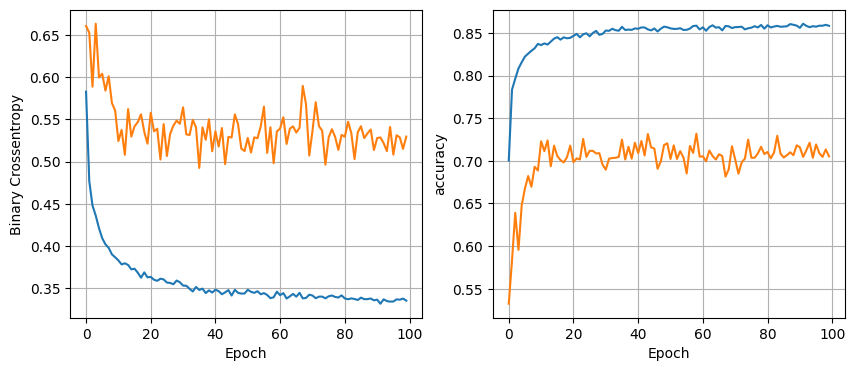

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8738
nodes = 16, dropout = 0.2, lr = 0.001, batch size = 64


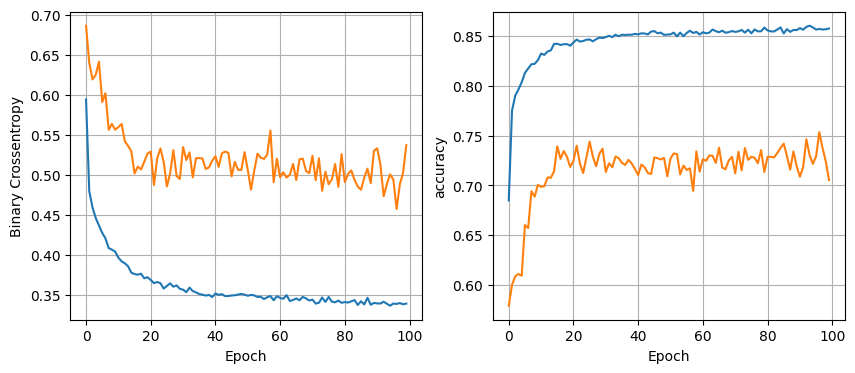

119/119 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8741
nodes = 16, dropout = 0.2, lr = 0.001, batch size = 128


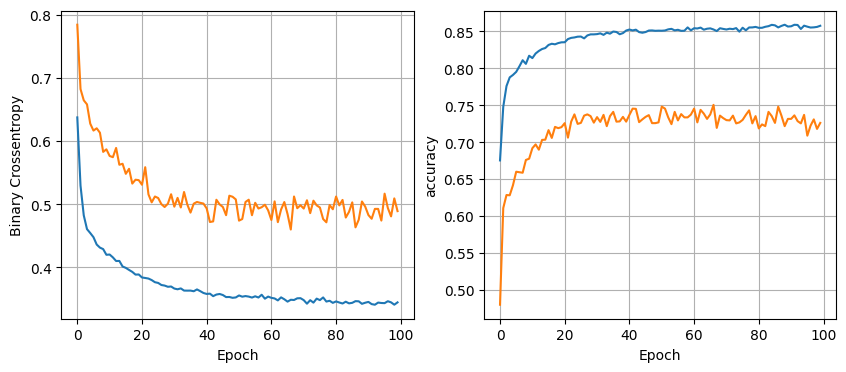

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8688
nodes = 32, dropout = 0, lr = 0.01, batch size = 32


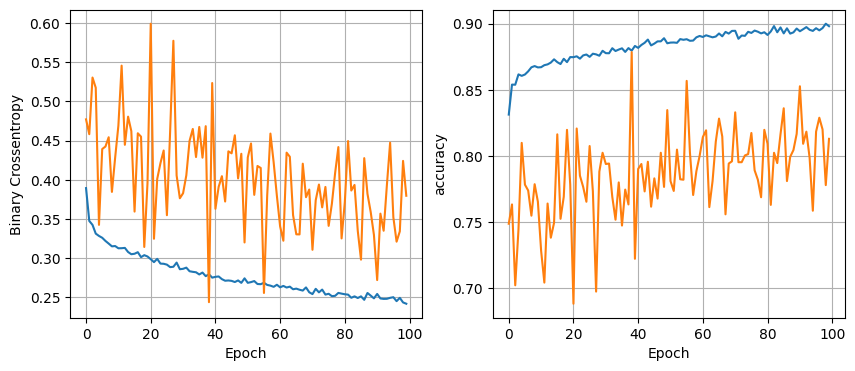

119/119 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8683
nodes = 32, dropout = 0, lr = 0.01, batch size = 64


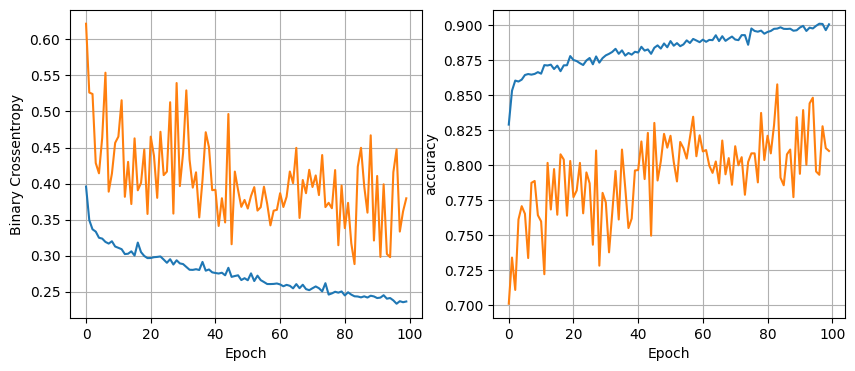

119/119 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8738
nodes = 32, dropout = 0, lr = 0.01, batch size = 128


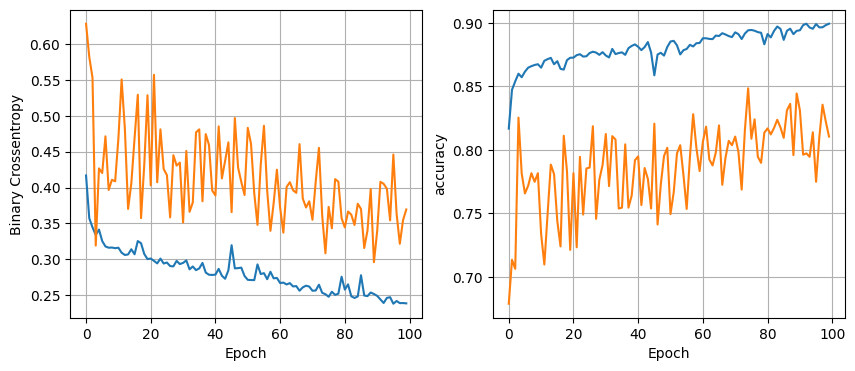

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8741
nodes = 32, dropout = 0, lr = 0.005, batch size = 32


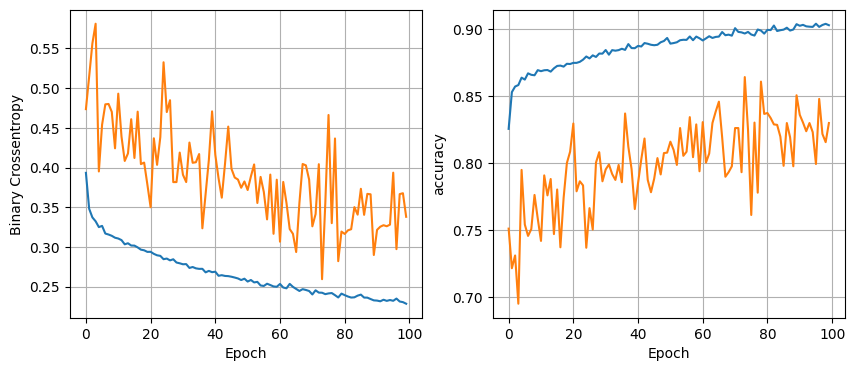

119/119 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8715
nodes = 32, dropout = 0, lr = 0.005, batch size = 64


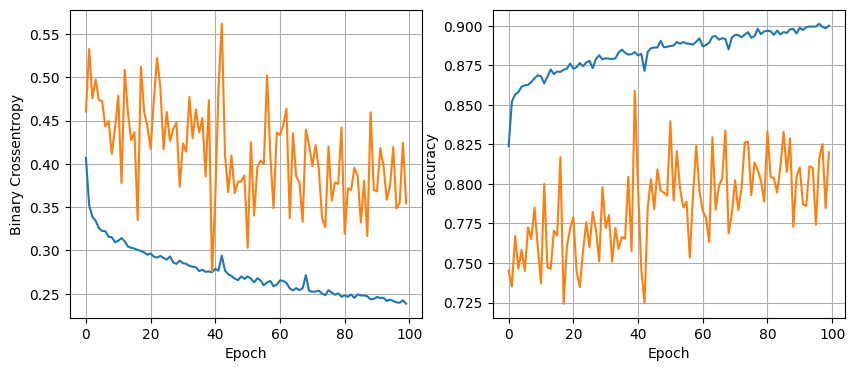

119/119 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8741
nodes = 32, dropout = 0, lr = 0.005, batch size = 128


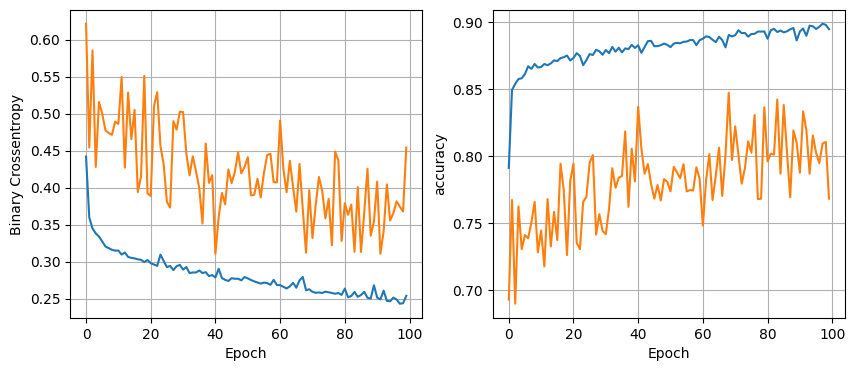

119/119 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8672
nodes = 32, dropout = 0, lr = 0.001, batch size = 32


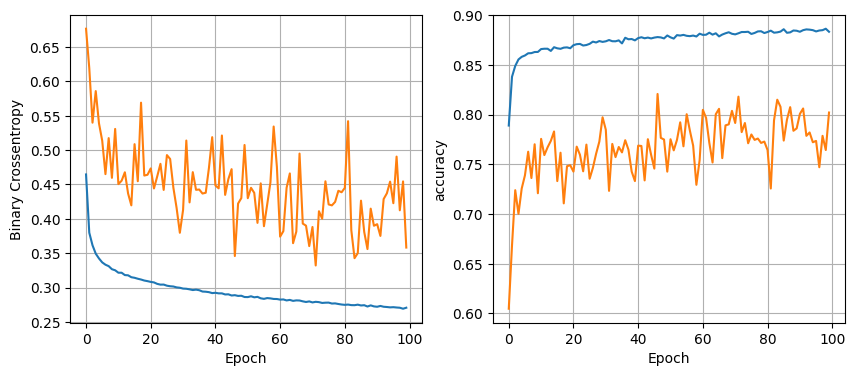

119/119 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8670
nodes = 32, dropout = 0, lr = 0.001, batch size = 64


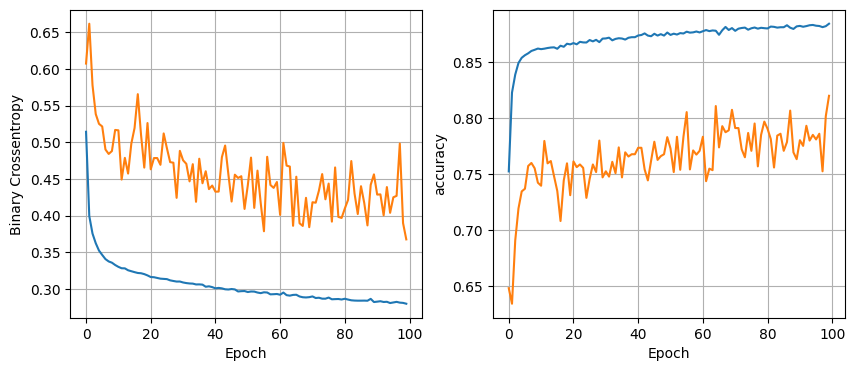

119/119 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8754
nodes = 32, dropout = 0, lr = 0.001, batch size = 128


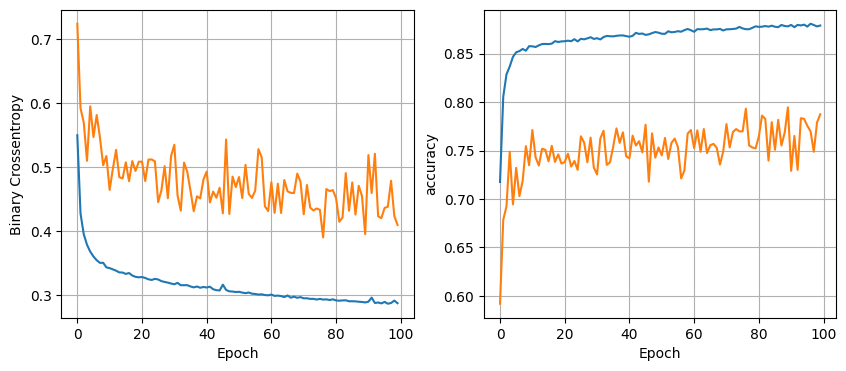

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8736
nodes = 32, dropout = 0.2, lr = 0.01, batch size = 32


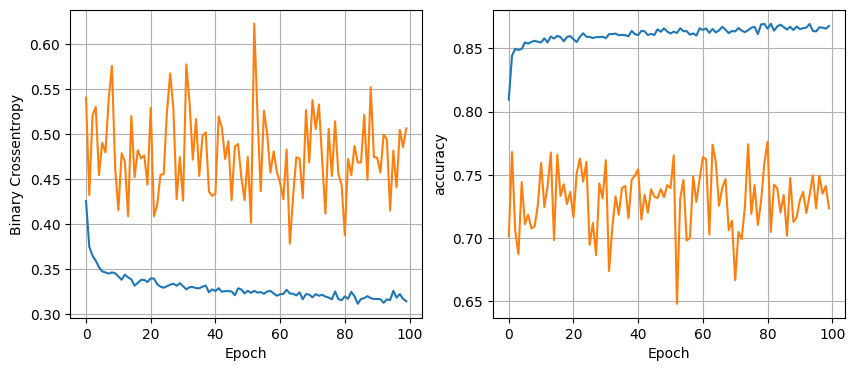

119/119 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8767
nodes = 32, dropout = 0.2, lr = 0.01, batch size = 64


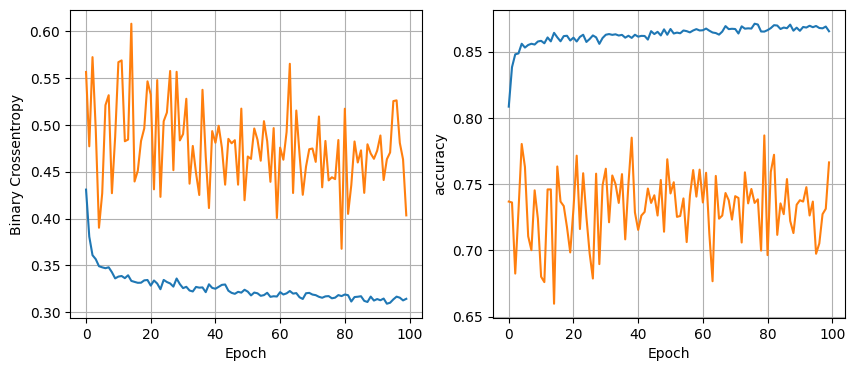

119/119 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8814
nodes = 32, dropout = 0.2, lr = 0.01, batch size = 128


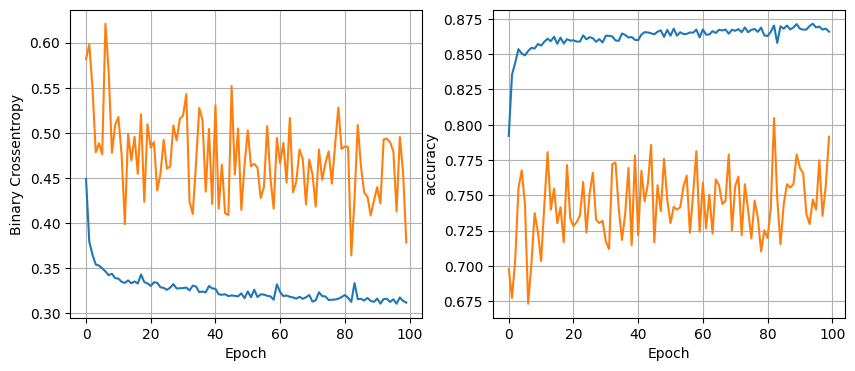

119/119 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8746
nodes = 32, dropout = 0.2, lr = 0.005, batch size = 32


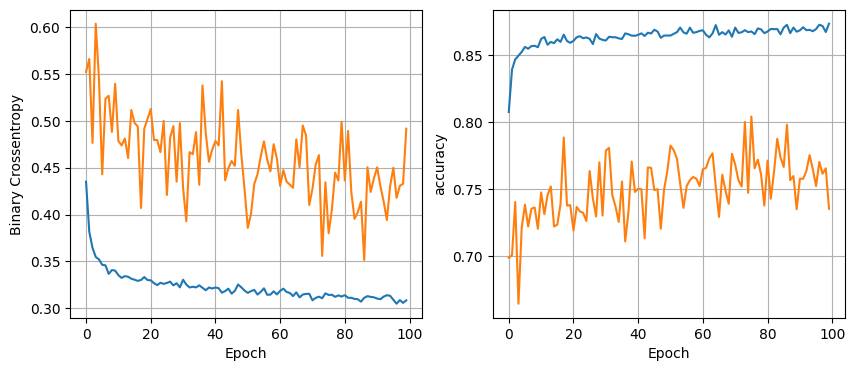

119/119 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8767
nodes = 32, dropout = 0.2, lr = 0.005, batch size = 64


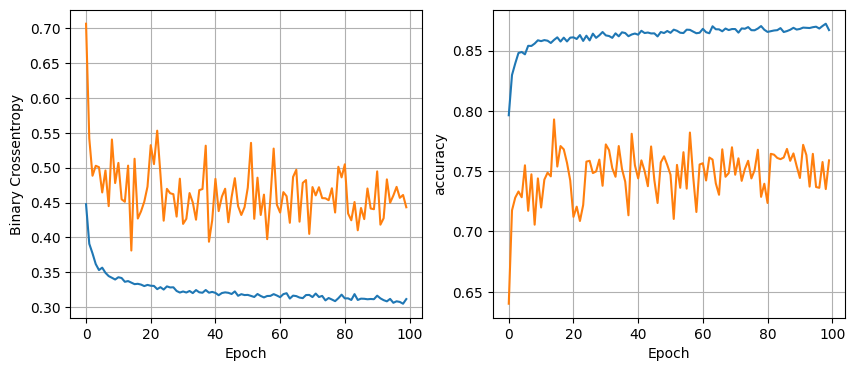

119/119 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8799
nodes = 32, dropout = 0.2, lr = 0.005, batch size = 128


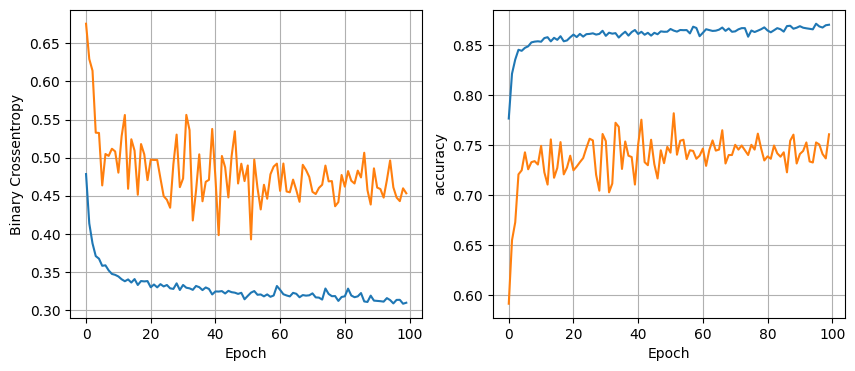

119/119 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8796
nodes = 32, dropout = 0.2, lr = 0.001, batch size = 32


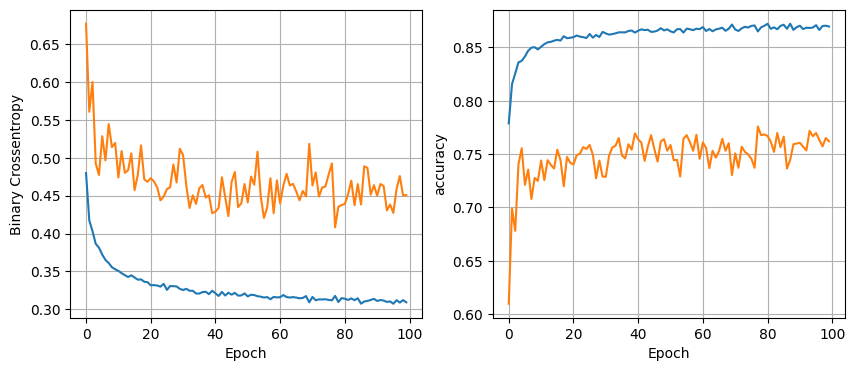

119/119 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8770
nodes = 32, dropout = 0.2, lr = 0.001, batch size = 64


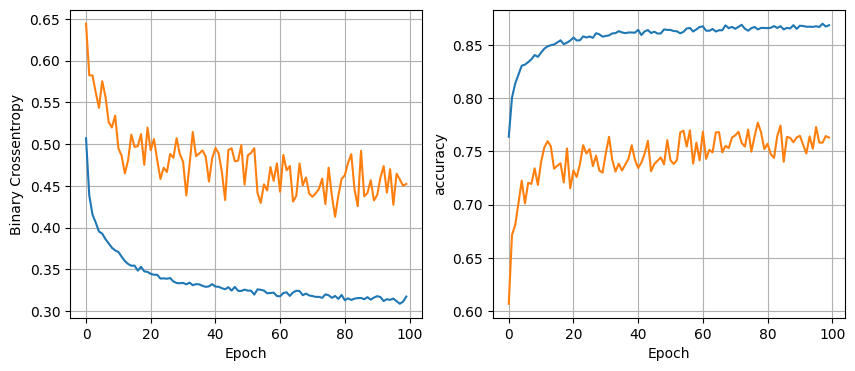

119/119 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8772
nodes = 32, dropout = 0.2, lr = 0.001, batch size = 128


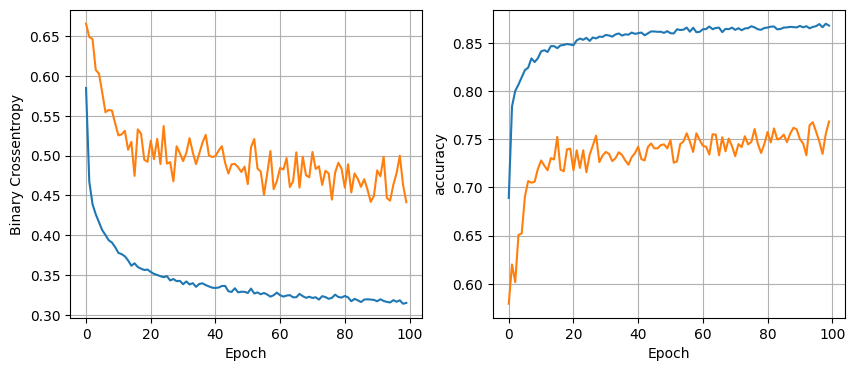

119/119 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8767
nodes = 64, dropout = 0, lr = 0.01, batch size = 32


119/119 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.8625
nodes = 64, dropout = 0, lr = 0.01, batch size = 64


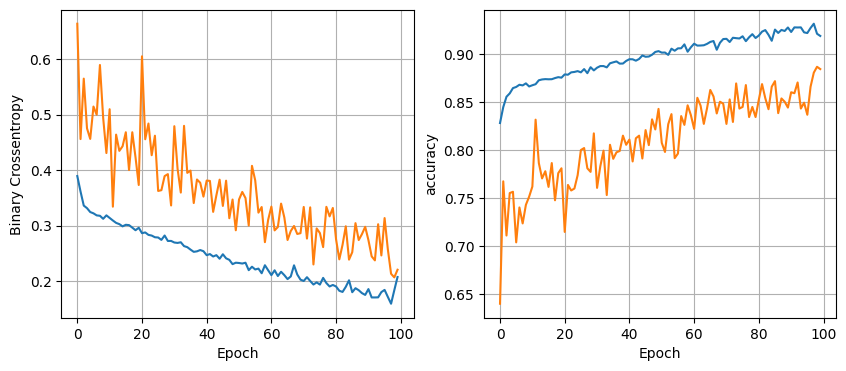

119/119 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.8630
nodes = 64, dropout = 0, lr = 0.01, batch size = 128


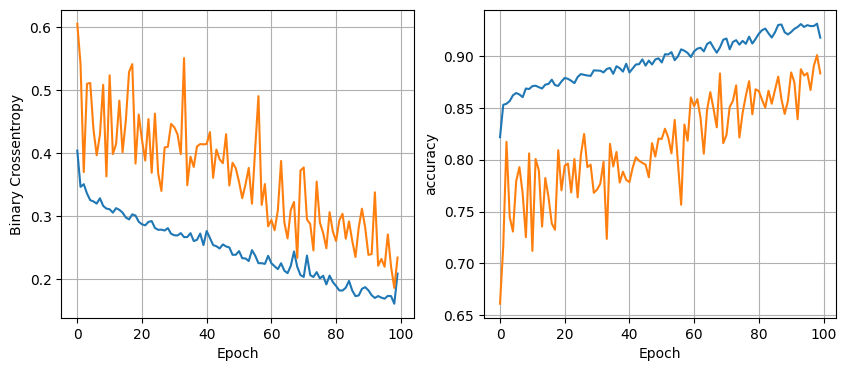

119/119 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8546
nodes = 64, dropout = 0, lr = 0.005, batch size = 32


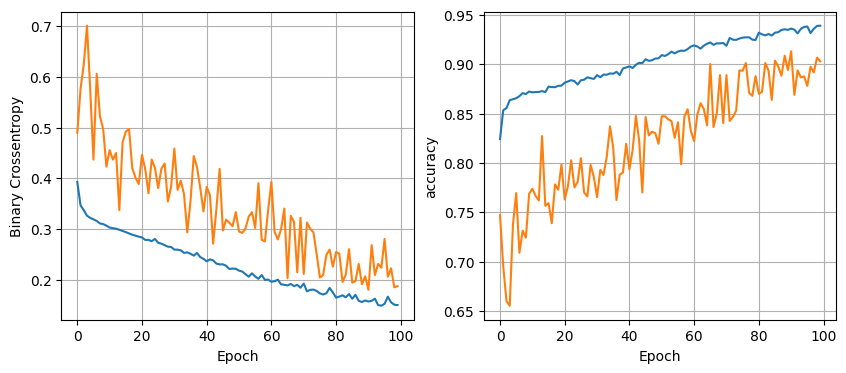

119/119 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.8494
nodes = 64, dropout = 0, lr = 0.005, batch size = 64


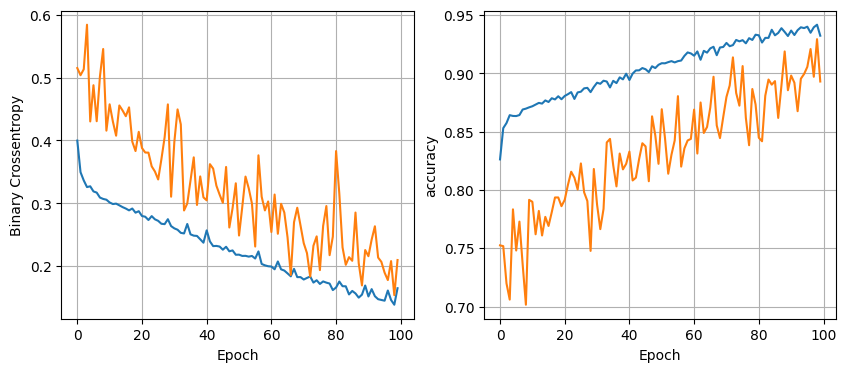

119/119 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.8586
nodes = 64, dropout = 0, lr = 0.005, batch size = 128


119/119 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8709
nodes = 64, dropout = 0, lr = 0.001, batch size = 32


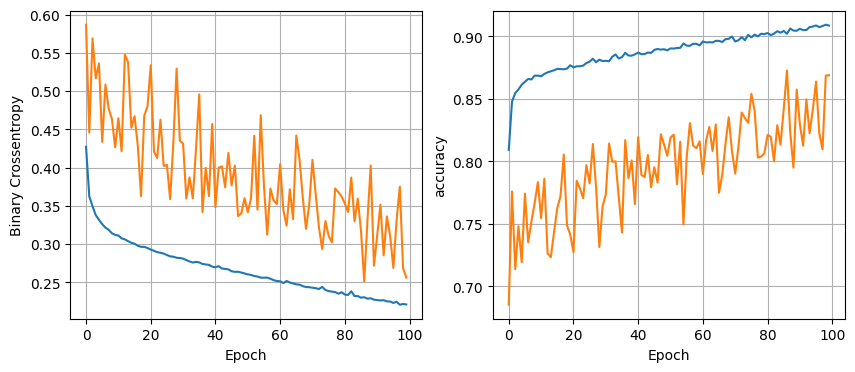

119/119 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8709
nodes = 64, dropout = 0, lr = 0.001, batch size = 64


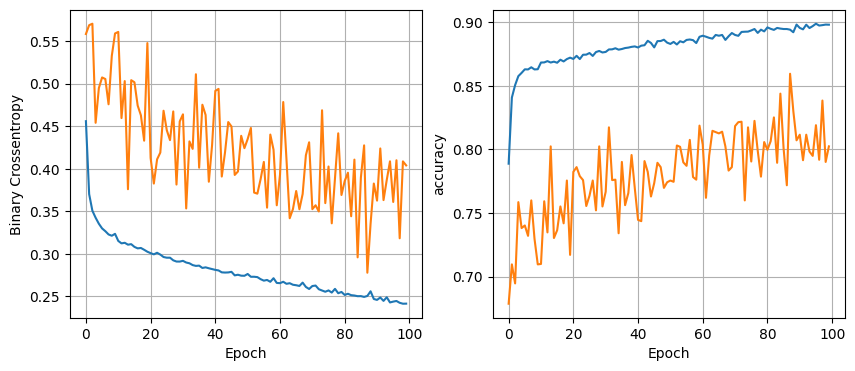

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8804
nodes = 64, dropout = 0, lr = 0.001, batch size = 128


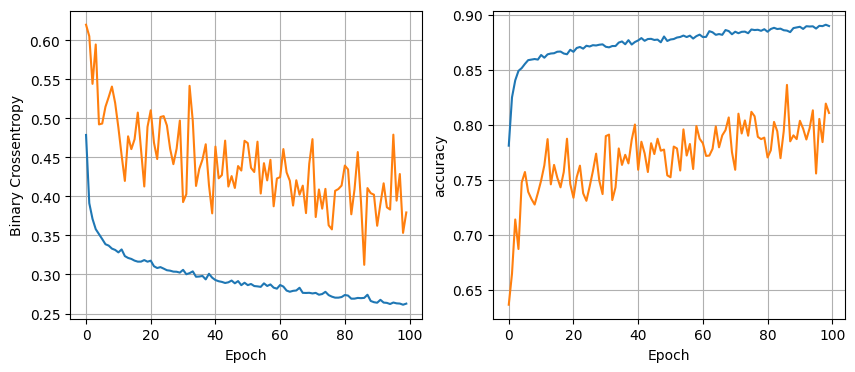

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8736
nodes = 64, dropout = 0.2, lr = 0.01, batch size = 32


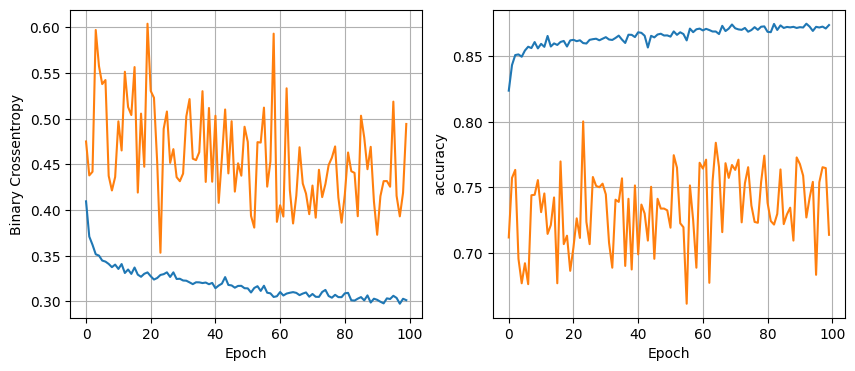

119/119 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8757
nodes = 64, dropout = 0.2, lr = 0.01, batch size = 64


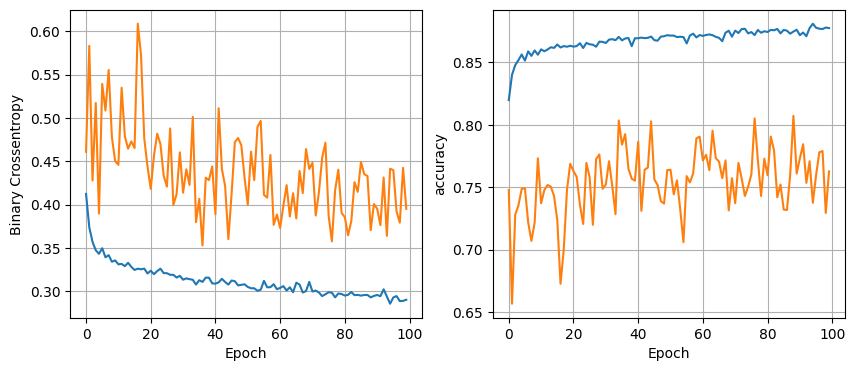

119/119 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8770
nodes = 64, dropout = 0.2, lr = 0.01, batch size = 128


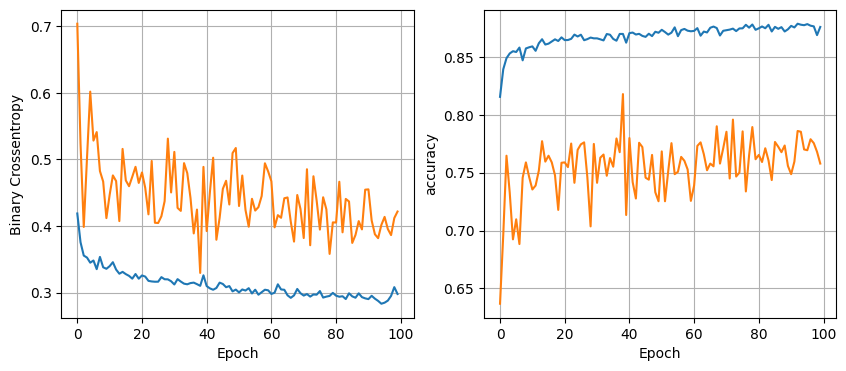

119/119 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8817
nodes = 64, dropout = 0.2, lr = 0.005, batch size = 32


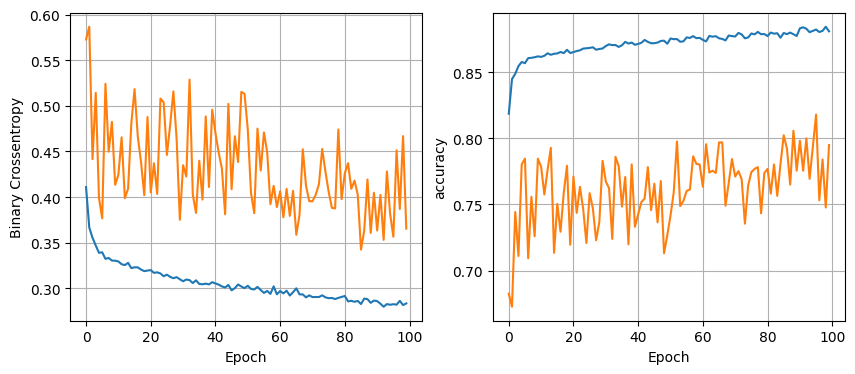

119/119 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8828
nodes = 64, dropout = 0.2, lr = 0.005, batch size = 64


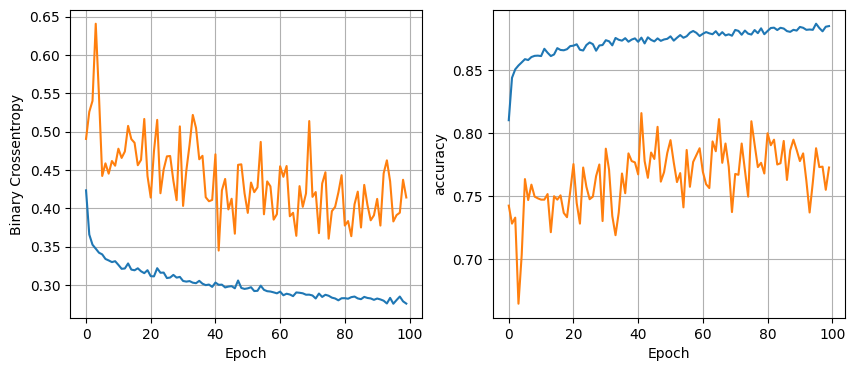

119/119 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8807
nodes = 64, dropout = 0.2, lr = 0.005, batch size = 128


119/119 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8822
nodes = 64, dropout = 0.2, lr = 0.001, batch size = 32


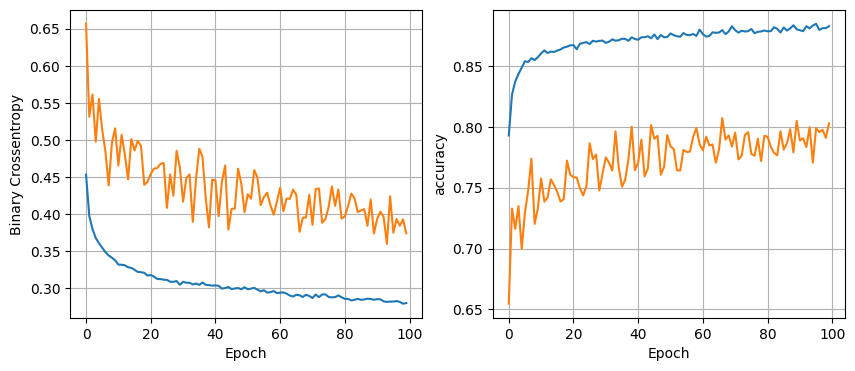

119/119 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8775
nodes = 64, dropout = 0.2, lr = 0.001, batch size = 64


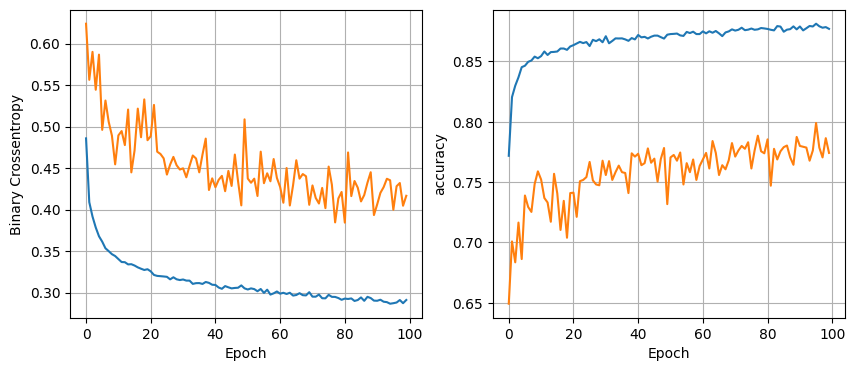

119/119 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8820
nodes = 64, dropout = 0.2, lr = 0.001, batch size = 128


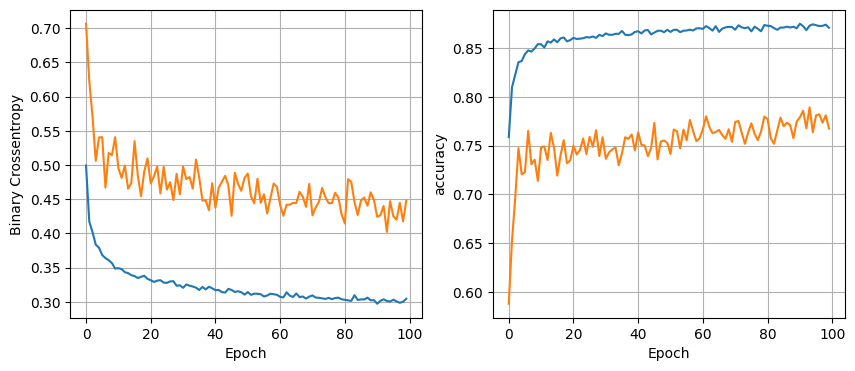

119/119 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.8817


In [32]:
least_val_loss = float('inf')
least_val_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'nodes = {num_nodes}, dropout = {dropout_prob}, lr = {lr}, batch size = {batch_size}')
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                
                # Evaluate on the validation set and get the loss value
                val_loss = model.evaluate(X_valid, Y_valid)[0]

                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_model = model
